# Первичное исследование данных

In [53]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

Объединим имеющиеся датасеты со спаршенными данными о фильмах

In [5]:
first = pd.read_csv('parsed_300_311.csv')
second = pd.read_csv('parsed_312_314.csv')
third = pd.read_csv('parsed_316_399.csv')
fourth = pd.read_csv('parsed_400_499.csv')
fifth = pd.read_csv('parsed_500_599.csv')
sixth = pd.read_csv('parsed_600_731.csv')
seventh = pd.read_csv('parsed_733_799.csv')
eighth = pd.read_csv('parsed_800_899.csv')
ninth = pd.read_csv('parsed_900_999.csv')
elvnth = pd.read_csv('parsed_1100_1226.csv')
twlvth = pd.read_csv('parsed_1228_1300.csv')
thrtth = pd.read_csv('parsed_2000_2040.csv')
frtth = pd.read_csv('parsed_2043_2248.csv')
fftth = pd.read_csv('parsed_2250_2299.csv')
sxtth = pd.read_csv('parsed_2300_2333.csv')
svth = pd.read_csv('parsed_2335_2365.csv')
eghtth = pd.read_csv('parsed_2367_2540.csv')
nntth = pd.read_csv('parsed_2542_2602.csv')
twth = pd.read_csv('parsed_2604_2680.csv')
twscndth = pd.read_csv('parsed_2682_2720.csv') 
twthrd = pd.read_csv('parsed_2722_2730.csv') 
twfrth = pd.read_csv('parsed_2732_2759.csv') 
twffth = pd.read_csv('parsed_2761_2799.csv') 

In [7]:
united_df = pd.concat([first, second, third, fourth, fifth, sixth, seventh, eighth, ninth, elvnth, twlvth, thrtth, frtth, fftth, sxtth, svth, eghtth, nntth, twth, twscndth, twthrd, twfrth, twffth])

Имеем следующие столбцы:

In [9]:
united_df.columns

Index(['Unnamed: 0', 'kinopoiskId', 'imdbId', 'nameRu', 'nameEn',
       'nameOriginal', 'posterUrl', 'posterUrlPreview', 'coverUrl', 'logoUrl',
       'reviewsCount', 'ratingGoodReview', 'ratingGoodReviewVoteCount',
       'ratingKinopoisk', 'ratingKinopoiskVoteCount', 'ratingImdb',
       'ratingImdbVoteCount', 'ratingFilmCritics',
       'ratingFilmCriticsVoteCount', 'ratingAwait', 'ratingAwaitCount',
       'ratingRfCritics', 'ratingRfCriticsVoteCount', 'webUrl', 'year',
       'filmLength', 'slogan', 'description', 'shortDescription',
       'editorAnnotation', 'isTicketsAvailable', 'productionStatus', 'type',
       'ratingMpaa', 'ratingAgeLimits', 'countries', 'genres', 'startYear',
       'endYear', 'serial', 'shortFilm', 'completed', 'hasImax', 'has3D',
       'lastSync', 'message'],
      dtype='object')

В первую очередь нас интересуют жанры

In [17]:
united_df['genres']

0     [{'genre': 'мелодрама'}, {'genre': 'приключени...
1        [{'genre': 'фантастика'}, {'genre': 'боевик'}]
2     [{'genre': 'драма'}, {'genre': 'детектив'}, {'...
3        [{'genre': 'мелодрама'}, {'genre': 'комедия'}]
4         [{'genre': 'триллер'}, {'genre': 'криминал'}]
                            ...                        
34    [{'genre': 'фэнтези'}, {'genre': 'комедия'}, {...
35    [{'genre': 'криминал'}, {'genre': 'приключения...
36                               [{'genre': 'комедия'}]
37           [{'genre': 'комедия'}, {'genre': 'спорт'}]
38    [{'genre': 'драма'}, {'genre': 'комедия'}, {'g...
Name: genres, Length: 1810, dtype: object

"Распакуем" данные, чтобы оценить количество фильмов каждого из жанров и использовать их в дальнейшем

In [35]:
fixed_genres_col = []
for index, row in united_df.iterrows():
    items = re.findall(": '(.*?)'}", row['genres'])
    fixed_genres_col.append(items)

In [37]:
united_df['genres'] = fixed_genres_col

In [39]:
all_genres_everywhere = []
for index, row in united_df.iterrows():
    for i in row['genres']:
        all_genres_everywhere.append(i)  

In [52]:
Counter(all_genres_everywhere)

Counter({'мелодрама': 427,
         'приключения': 204,
         'комедия': 721,
         'музыка': 42,
         'семейный': 120,
         'фантастика': 158,
         'боевик': 260,
         'драма': 1008,
         'детектив': 146,
         'триллер': 361,
         'криминал': 311,
         'фэнтези': 103,
         'спорт': 38,
         'биография': 80,
         'военный': 105,
         'история': 69,
         'ужасы': 94,
         'вестерн': 78,
         'фильм-нуар': 40,
         'мюзикл': 64,
         'мультфильм': 62,
         'аниме': 5,
         'документальный': 29,
         'короткометражка': 157})

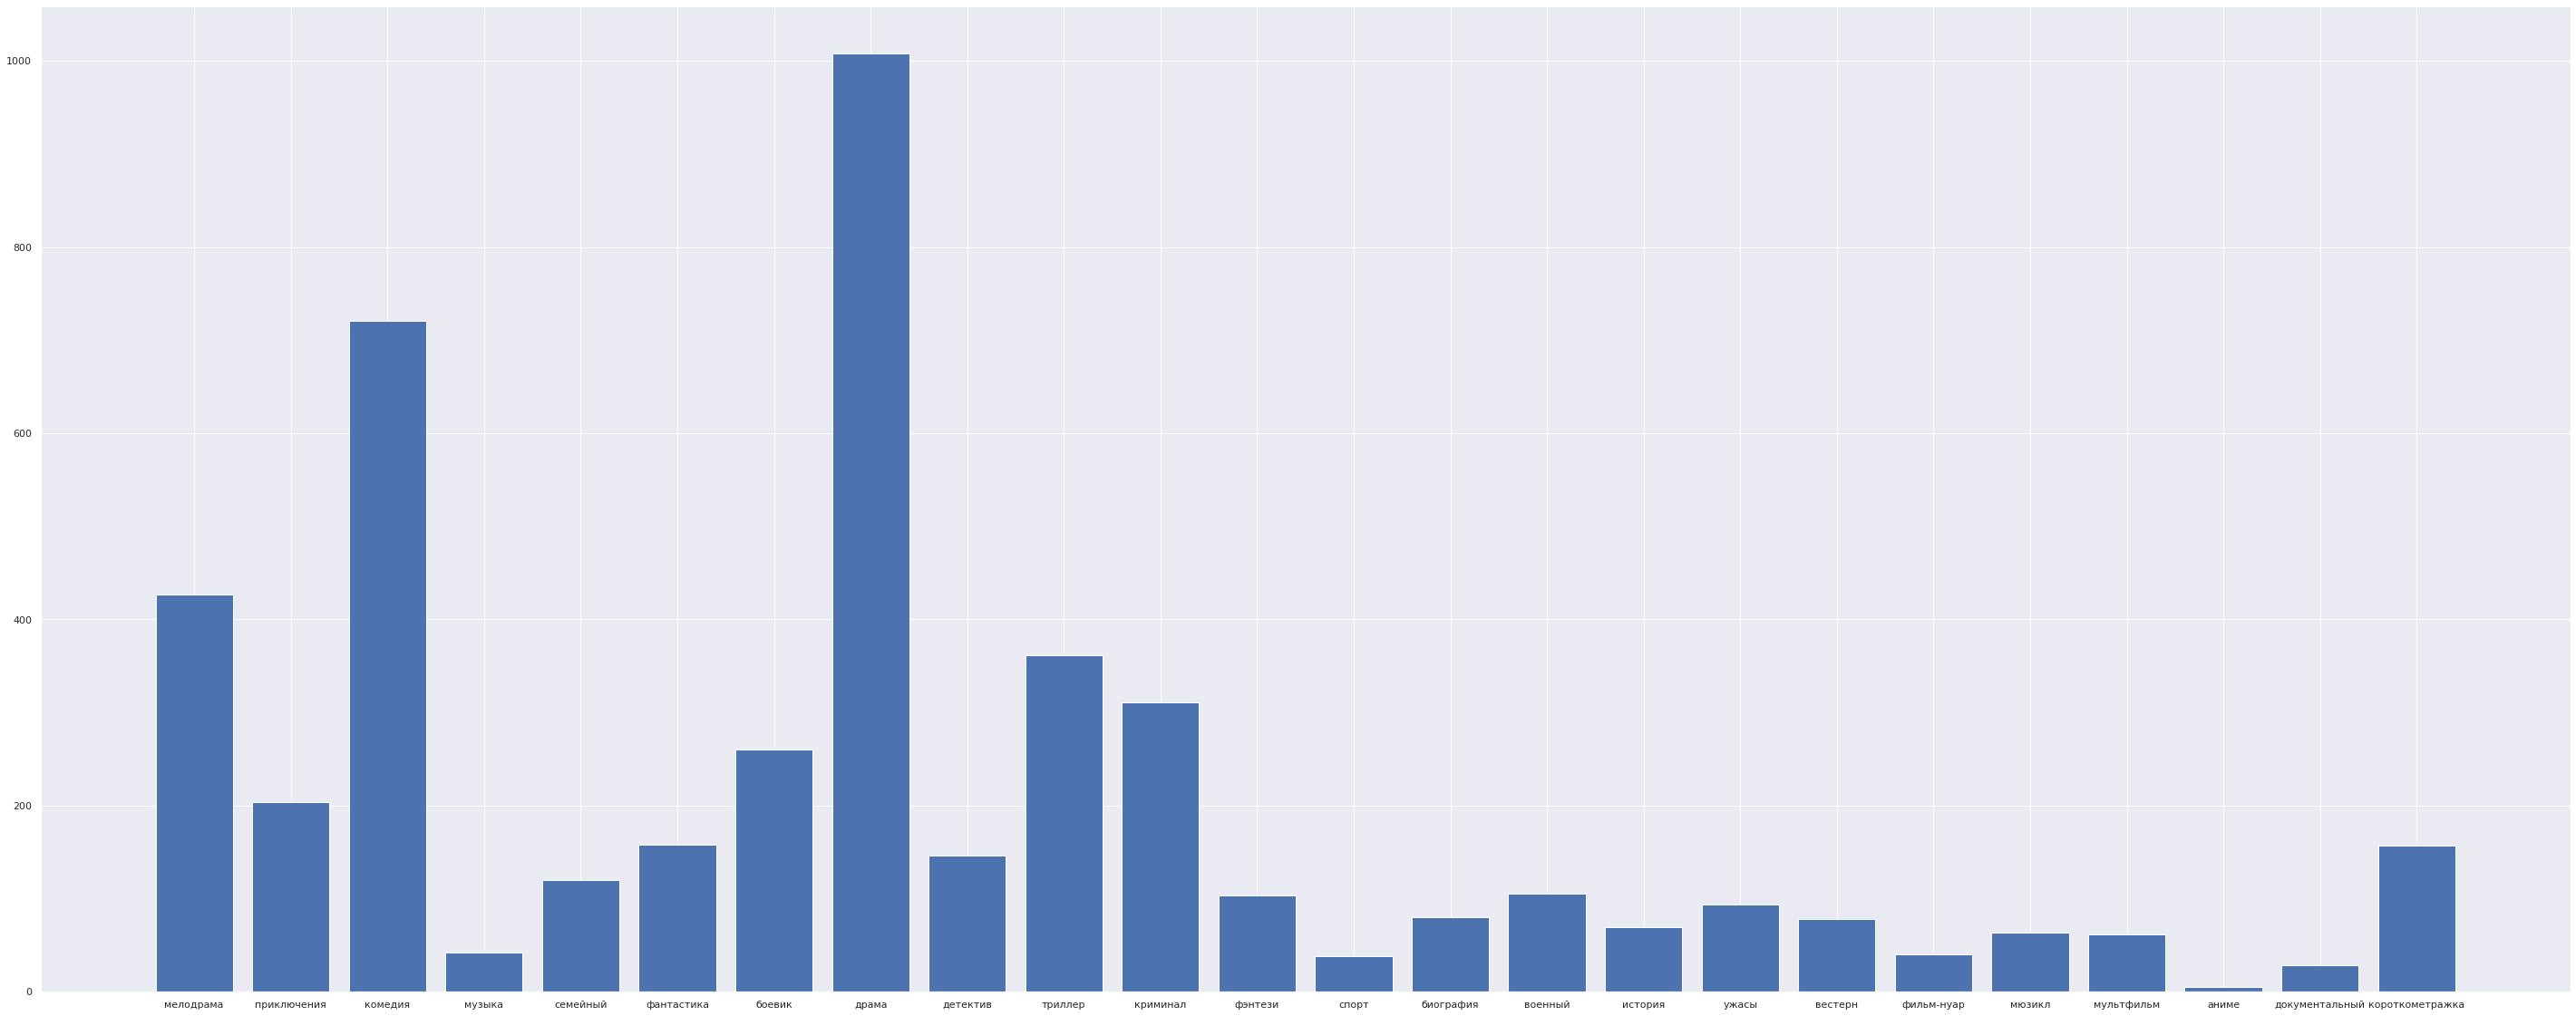

In [70]:
plt.figure(figsize=(50,20))
plt.bar(list(Counter(all_genres_everywhere).keys()), Counter(all_genres_everywhere).values())
plt.show()

Довольно сильный дисбаланс жанров. Для разработки MVP имеет смысл убрать фильмы жанра аниме, так как их всего 5, с остальными жанрами можно работать

Для сортировки по рейтингу необходимо подобрать то, какой из столбцов, отражающих оценки на различных сервисах мы будем использовть. Рассмотрим столбцы 'ratingGoodReview', 
       'ratingKinopoisk', 'ratingImdb',
        'ratingFilmCritics',
        'ratingAwait', 
       'ratingRfCritics'

In [94]:
united_df['ratingGoodReview'].isnull().sum()

621

In [73]:
united_df['ratingGoodReview'].value_counts()

100.0    305
75.0      58
87.5      36
83.3      36
50.0      34
        ... 
80.2       1
98.9       1
95.9       1
98.4       1
76.1       1
Name: ratingGoodReview, Length: 226, dtype: int64

In [95]:
united_df['ratingKinopoisk'].isnull().sum()

466

In [75]:
united_df['ratingKinopoisk'].value_counts()

6.8    73
7.1    73
7.0    71
7.2    65
6.9    65
7.8    64
6.7    63
7.7    61
7.6    60
7.3    56
6.6    55
8.0    50
7.4    44
8.1    42
7.9    42
7.5    41
6.1    40
6.3    34
6.0    34
6.2    32
6.4    32
6.5    30
5.7    27
5.9    25
5.8    17
5.6    16
5.3    13
8.5    12
8.2    12
5.0     9
5.2     9
8.3     9
8.6     8
5.4     7
5.5     7
4.8     5
5.1     5
4.7     5
4.9     4
8.4     3
4.4     3
4.2     3
8.7     2
4.5     2
9.1     2
8.8     2
2.9     1
4.1     1
3.8     1
3.4     1
8.9     1
4.6     1
2.8     1
4.3     1
4.0     1
3.0     1
Name: ratingKinopoisk, dtype: int64

In [96]:
united_df['ratingImdb'].isnull().sum()

72

In [77]:
united_df['ratingImdb'].value_counts()

6.4    84
6.2    73
6.6    69
6.1    66
6.7    65
       ..
3.2     1
3.3     1
9.3     1
2.5     1
2.4     1
Name: ratingImdb, Length: 68, dtype: int64

In [97]:
united_df['ratingFilmCritics'].isnull().sum()

778

In [87]:
united_df['ratingFilmCritics'].value_counts()

6.3    32
7.3    30
5.8    30
6.0    29
6.9    29
       ..
2.7     1
2.5     1
9.6     1
3.3     1
2.9     1
Name: ratingFilmCritics, Length: 73, dtype: int64

In [98]:
united_df['ratingAwait'].isnull().sum()

1810

In [88]:
united_df['ratingAwait'].value_counts()

Series([], Name: ratingAwait, dtype: int64)

In [99]:
united_df['ratingRfCritics'].isnull().sum()

1748

In [89]:
united_df['ratingRfCritics'].value_counts()

100.0000    26
80.0000      8
75.0000      5
50.0000      4
66.6667      4
33.3333      3
71.4286      2
60.0000      2
0.0000       1
83.3333      1
20.0000      1
30.0000      1
85.7143      1
90.0000      1
42.8571      1
55.5556      1
Name: ratingRfCritics, dtype: int64

В столбце ratingImdb меньше всего пропусков, оценки от 2.8 до 9.1. В районе 7 баллов - пик распределения. Столбец предположительно подходит для сортировки

Дизайн-ревью рек. системы: Матрица n на n из фильмов, если у фильмов нет пересечений по жанрам, в пересечении их строк стоит 0, если 1, то 1 и т.д. В рекомендацию идут фильмы с наибольшим значением в пересечении (5 штук) - также происходит сортировка по оценке - столбец ratingImdb